In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

from catboost import CatBoostClassifier    #Please install catboost (!pip install catboost)  
from sklearn.metrics import r2_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix,roc_auc_score,roc_curve

In [116]:
german = pd.read_csv("C:/Users/matages/Desktop/German_Credit/german.csv", sep =" ",header =None)

In [117]:
german

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,A14,12,A32,A42,1736,A61,A74,3,A92,A101,...,A121,31,A143,A152,1,A172,1,A191,A201,1
996,A11,30,A32,A41,3857,A61,A73,4,A91,A101,...,A122,40,A143,A152,1,A174,1,A192,A201,1
997,A14,12,A32,A43,804,A61,A75,4,A93,A101,...,A123,38,A143,A152,1,A173,1,A191,A201,1
998,A11,45,A32,A43,1845,A61,A73,4,A93,A101,...,A124,23,A143,A153,1,A173,1,A192,A201,2


In [118]:
german = german.set_axis(['Status of existing checking account','Duration in month','Credit history','Purpose','Credit amount',
                'Savings account/bonds','Present employment since','Installment rate in percentage of disposable income',
                'Personal status and sex','Other debtors / guarantors','Present residence since','Property',
                'Age in years','Other installment plans','Housing','Number of existing credits at this bank',
                'Job','Number of people being liable to provide maintenance for','Telephone','foreign worker','Class'],
                axis='columns')

In [119]:
german.columns

Index(['Status of existing checking account', 'Duration in month',
       'Credit history', 'Purpose', 'Credit amount', 'Savings account/bonds',
       'Present employment since',
       'Installment rate in percentage of disposable income',
       'Personal status and sex', 'Other debtors / guarantors',
       'Present residence since', 'Property', 'Age in years',
       'Other installment plans', 'Housing',
       'Number of existing credits at this bank', 'Job',
       'Number of people being liable to provide maintenance for', 'Telephone',
       'foreign worker', 'Class'],
      dtype='object')

In [120]:
german.head()

,Status of existing checking account,Duration in month,Credit history,Purpose,Credit amount,Savings account/bonds,Present employment since,Installment rate in percentage of disposable income,Personal status and sex,Other debtors / guarantors,...,Property,Age in years,Other installment plans,Housing,Number of existing credits at this bank,Job,Number of people being liable to provide maintenance for,Telephone,foreign worker,Class
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


In [121]:
german.isnull().sum()

Status of existing checking account                         0
Duration in month                                           0
Credit history                                              0
Purpose                                                     0
Credit amount                                               0
Savings account/bonds                                       0
Present employment since                                    0
Installment rate in percentage of disposable income         0
Personal status and sex                                     0
Other debtors / guarantors                                  0
Present residence since                                     0
Property                                                    0
Age in years                                                0
Other installment plans                                     0
Housing                                                     0
Number of existing credits at this bank                     0
Job     

In [122]:
german.dtypes

Status of existing checking account                         object
Duration in month                                            int64
Credit history                                              object
Purpose                                                     object
Credit amount                                                int64
Savings account/bonds                                       object
Present employment since                                    object
Installment rate in percentage of disposable income          int64
Personal status and sex                                     object
Other debtors / guarantors                                  object
Present residence since                                      int64
Property                                                    object
Age in years                                                 int64
Other installment plans                                     object
Housing                                                     ob

In [123]:
ger_dict = {"A11" : "     ... <    0 DM",
"A12" : "0 <= ... <  200 DM",
"A13" :  "... >= 200 DM /salary assignments for at least 1 year",
"A14" : "no checking account",
"A30" : "no credits taken/all credits paid back duly",
"A31" : "all credits at this bank paid back duly",
"A32" : "existing credits paid back duly till now",
"A33" : "delay in paying off in the past",
"A34" : "critical account/other credits existing (not at this bank)",
"A40" : "car (new)",
"A41" : "car (used)",
"A42" : "furniture/equipment",
"A43" : "radio/television",
"A44" : "domestic appliances",
"A45" : "repairs",
"A46" : "education",
"A47" : "(vacation - does not exist?)",
"A48" : "retraining",
"A49" : "business",
"A410": "others",
"A61" :  "        ... <  100 DM",
"A62" :  " 100 <= ... <  500 DM",
"A63" :  " 500 <= ... < 1000 DM",
"A64" :   "       .. >= 1000 DM",
"A65" :  "unknown/ no savings account",
"A71" : "unemployed",
"A72" : "      ... < 1 year",
"A73" : "1  <= ... < 4 years", 
"A74" : "4  <= ... < 7 years",
"A75" : "      .. >= 7 years",
"A91" : "male   : divorced/separated",
"A92" : "female : divorced/separated/married",
"A93" : "male   : single",
"A94" : "male   : married/widowed",
"A95" : "female : single",
"A101" : "none",
"A102" : "co-applicant",
"A103" : "guarantor",
"A121" : "real estate",
"A122" : "if not A121 : building society savings agreement/life insurance",
"A123" : "if not A121/A122 : car or other, not in attribute 6",
"A124" : "unknown / no property",
"A141" : "bank",
"A142" : "stores",
"A143" : "none",
"A151" : "rent",
"A152" : "own",
"A153" : "for free",
"A171" : "unemployed/ unskilled  - non-resident",
"A172" : "unskilled - resident",
"A173" : "skilled employee / official",
"A174" : "management/ self-employed/highly qualified employee/ officer",
"A191" : "none",
"A192" : "yes, registered under the customers name",
"A201" : "yes",
"A202" : "no"}

In [124]:
german = german.replace(ger_dict)
german.head()

,Status of existing checking account,Duration in month,Credit history,Purpose,Credit amount,Savings account/bonds,Present employment since,Installment rate in percentage of disposable income,Personal status and sex,Other debtors / guarantors,...,Property,Age in years,Other installment plans,Housing,Number of existing credits at this bank,Job,Number of people being liable to provide maintenance for,Telephone,foreign worker,Class
0,... < 0 DM,6,critical account/other credits existing (not a...,radio/television,1169,unknown/ no savings account,.. >= 7 years,4,male : single,none,...,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes,1
1,0 <= ... < 200 DM,48,existing credits paid back duly till now,radio/television,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,none,...,real estate,22,none,own,1,skilled employee / official,1,none,yes,2
2,no checking account,12,critical account/other credits existing (not a...,education,2096,... < 100 DM,4 <= ... < 7 years,2,male : single,none,...,real estate,49,none,own,1,unskilled - resident,2,none,yes,1
3,... < 0 DM,42,existing credits paid back duly till now,furniture/equipment,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,guarantor,...,if not A121 : building society savings agreeme...,45,none,for free,1,skilled employee / official,2,none,yes,1
4,... < 0 DM,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : single,none,...,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes,2


In [125]:
german['Class'] = german['Class'].map({1:'Good',2:'Bad'})

In [126]:
for i in german.select_dtypes(include ='object').columns:
    print(german[i].value_counts())
    print()

Status of existing checking account
no checking account                                      394
     ... <    0 DM                                       274
0 <= ... <  200 DM                                       269
... >= 200 DM /salary assignments for at least 1 year     63
Name: count, dtype: int64

Credit history
existing credits paid back duly till now                      530
critical account/other credits existing (not at this bank)    293
delay in paying off in the past                                88
all credits at this bank paid back duly                        49
no credits taken/all credits paid back duly                    40
Name: count, dtype: int64

Purpose
radio/television       280
car (new)              234
furniture/equipment    181
car (used)             103
business                97
education               50
repairs                 22
domestic appliances     12
others                  12
retraining               9
Name: count, dtype: int64

Savings account/

In [127]:
german.select_dtypes(include ='integer').columns

Index(['Duration in month', 'Credit amount',
       'Installment rate in percentage of disposable income',
       'Present residence since', 'Age in years',
       'Number of existing credits at this bank',
       'Number of people being liable to provide maintenance for'],
      dtype='object')

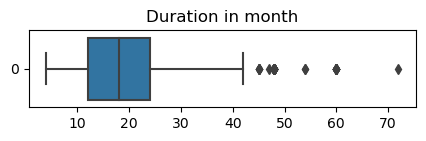

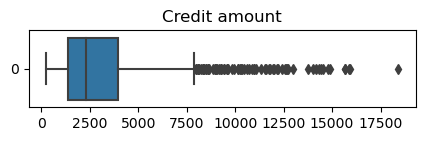

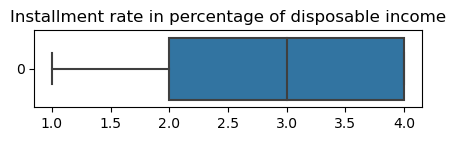

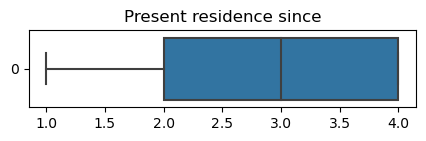

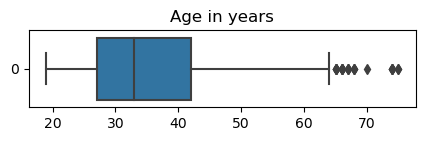

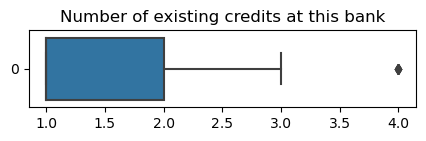

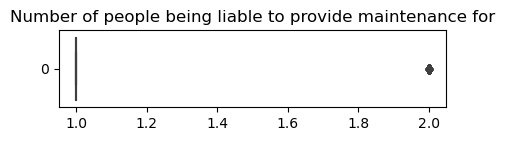

In [128]:
for i in german.select_dtypes(include ='integer').columns :
    plt.figure(figsize =(5,1))
    sns.boxplot(german[i],orient="h")
    plt.title(i)
    plt.show()

In [129]:
german['Number of people being liable to provide maintenance for'].value_counts()

Number of people being liable to provide maintenance for
1    845
2    155
Name: count, dtype: int64

In [130]:
german['Class']

0      Good
1       Bad
2      Good
3      Good
4       Bad
       ... 
995    Good
996    Good
997    Good
998     Bad
999    Good
Name: Class, Length: 1000, dtype: object

In [131]:
german.to_csv("C:/Users/matages/Desktop/German_Credit/german_clean.csv")